In [2]:
import pandas as pd
import numpy as np



# This notebook provides some practice problems to supplement the Intro to Probability and Statistics Unit in the Women in Analytics Training curriculum. 

We will practice doing basic probability and statistics in Python through various examples. It is important to note that there are many different ways to achieve the same results in Python. We will only be looking at a few of the most common ways to approach these problems. As you are reviewing and practicing, we encourage you to go back and try completing these using alternative methods so that you can understand the pros and cons of each technique

### Loading the Data

In [3]:
data = pd.read_csv('airbnb.csv')

C:\Users\muammar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Let's take an initial look at the data

In [4]:
data.dtypes

accommodates                int64
bathrooms                 float64
bed_type                   object
bedrooms                    int64
beds                        int64
cancellation_policy        object
city                       object
cleaning_fee                 bool
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate          int64
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
neighbourhood              object
number_of_reviews           int64
property_type              object
review_scores_rating        int64
room_type                  object
zipcode                    object
dtype: object

In [5]:
data.head()

,accommodates,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,first_review,host_has_profile_pic,...,instant_bookable,last_review,latitude,longitude,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,zipcode
0,1,1.0,Real Bed,1,1,flexible,SF,True,8/15/2016,t,...,t,1/18/2017,37.773742,-122.391503,Mission Bay,5,Apartment,95,Private room,95202\r\r\r\r\r\r\r
1,1,1.0,Real Bed,1,1,flexible,LA,False,NaN,t,...,f,NaN,34.135680,-118.400691,Studio City,6,House,100,Private room,91604-3646
2,2,1.0,Real Bed,1,1,moderate,LA,True,11/16/2011,t,...,f,4/8/2017,34.192617,-118.136794,Altadena,136,Apartment,96,Entire home/apt,91001-2243
3,2,1.0,Real Bed,1,1,flexible,LA,False,NaN,t,...,f,NaN,34.023618,-118.501174,Santa Monica,0,Apartment,96,Private room,90403-2638
4,2,1.0,Real Bed,1,1,moderate,LA,True,9/6/2010,t,...,f,2/28/2017,34.104213,-118.260040,Silver Lake,16,House,99,Private room,90039-2715


### Practice Questions


1. We expect that in general Airbnbs will have one bed per bedroom. Let's see if that is the case by comparing the average number of beds with the average number of bedrooms
2. For an Airbnb to be successful, hosts should have high response rates. We can assume that most hosts will have a high response rate and there will be few hosts with low response rates. Let's look into the distribution of response rates by comparing the quartiles
3. Let's say that we are feeling pretty spontaneous and we want to randomly pick an airbnb for our trip. What is the likelihood that we will pick an Airbnb that is an apartment? 
4. On average what are the review scores for Apartments vs. the average review scores for Houses? 
5. What is the liklihood that we will randomly pick and Airbnb that is an apartment AND has a review score greater than 95?
6. 

In [8]:
# 1

print('avg bedrooms', data['bedrooms'].mean())
print('avg beds', data['beds'].mean())

avg bedrooms 1.2657754923721238
avg beds 1.710873866364029


Minimum response rate 0
Maximum response rate 100
Median response rate 100.0
Average response rate 95.74790346392953
Q1 response rate 100.0
Q3 response rate 100.0


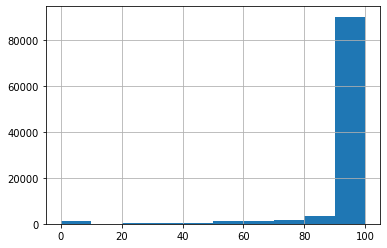

In [29]:
# 2

print('Minimum response rate', data['host_response_rate'].min())
print('Maximum response rate', data['host_response_rate'].max())

print('Median response rate', np.median(data['host_response_rate']))
print('Average response rate', data['host_response_rate'].mean())

print('Q1 response rate', np.percentile(data['host_response_rate'], 25, interpolation = 'midpoint'))
print('Q3 response rate', np.percentile(data['host_response_rate'], 75, interpolation = 'midpoint'))

data['host_response_rate'].hist()

In [31]:
# 3

print('Probability of randomly picking an Airbnb that is an apartment', len(data[data['property_type'] == 'Apartment'])/len(data)*100)



Probability of randomly picking an Airbnb that is an apartment 65.9592845162651


In [35]:
# 4

print('Average review scores for apartments', data[data['property_type'] == 'Apartment']['review_scores_rating'].mean())
print('Average review scores for houses', data[data['property_type'] == 'House']['review_scores_rating'].mean())

Average review scores for apartments 94.25400837457175
Average review scores for houses 94.8530979794812


In [39]:
# 5

prob_apt = len(data[data['property_type'] == 'Apartment'])/len(data)
prob_above95 = len(data[data['review_scores_rating'] > 95])/len(data)

print('The probability of randomly picking an Airbnb that is an apartment AND has a review score greater than 95', prob_apt*prob_above95*100)

The probability of randomly picking an Airbnb that is an apartment AND has a review score greater than 95 42.825275599061854


In [46]:
# 6 

prob_SM = len(data[data['neighbourhood'] == 'Santa Monica'])/len(data)
prob_SMand3 = len(data[(data['accommodates'] > 3) & (data['neighbourhood'] == 'Santa Monica')])/len(data)

print('The probability of getting an Airbnb that accommodates more than 3 people given that we pick an Airbnb in Santa Monica', prob_SMand3/prob_SM)

The probability of getting an Airbnb that accommodates more than 3 people given that we pick an Airbnb in Santa Monica 0.3518518518518518
